# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://pef.fa.us1.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX/job/4998">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.
- Located in Israel

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to one of the following:
    - roni.goldshmidt@ni.com / miriam.horovicz@ni.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [5]:
import pandas as pd
import zipfile

### Load Data

In [6]:
#load zip file
zf = zipfile.ZipFile('data.zip')

In [7]:
#load train data
df_wafers = pd.read_csv(zf.open('df_wafers.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,3b2e28,0,12,False,False
1,3b2e28,0,13,True,False
2,3b2e28,0,14,False,False
3,3b2e28,0,15,True,False
4,3b2e28,0,16,True,False


In [76]:
#load test data
df_wafers_test = pd.read_csv(zf.open('df_wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,5a6ad6,0,12,False
1,5a6ad6,0,13,True
2,5a6ad6,0,14,True
3,5a6ad6,0,15,True
4,5a6ad6,0,16,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [9]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

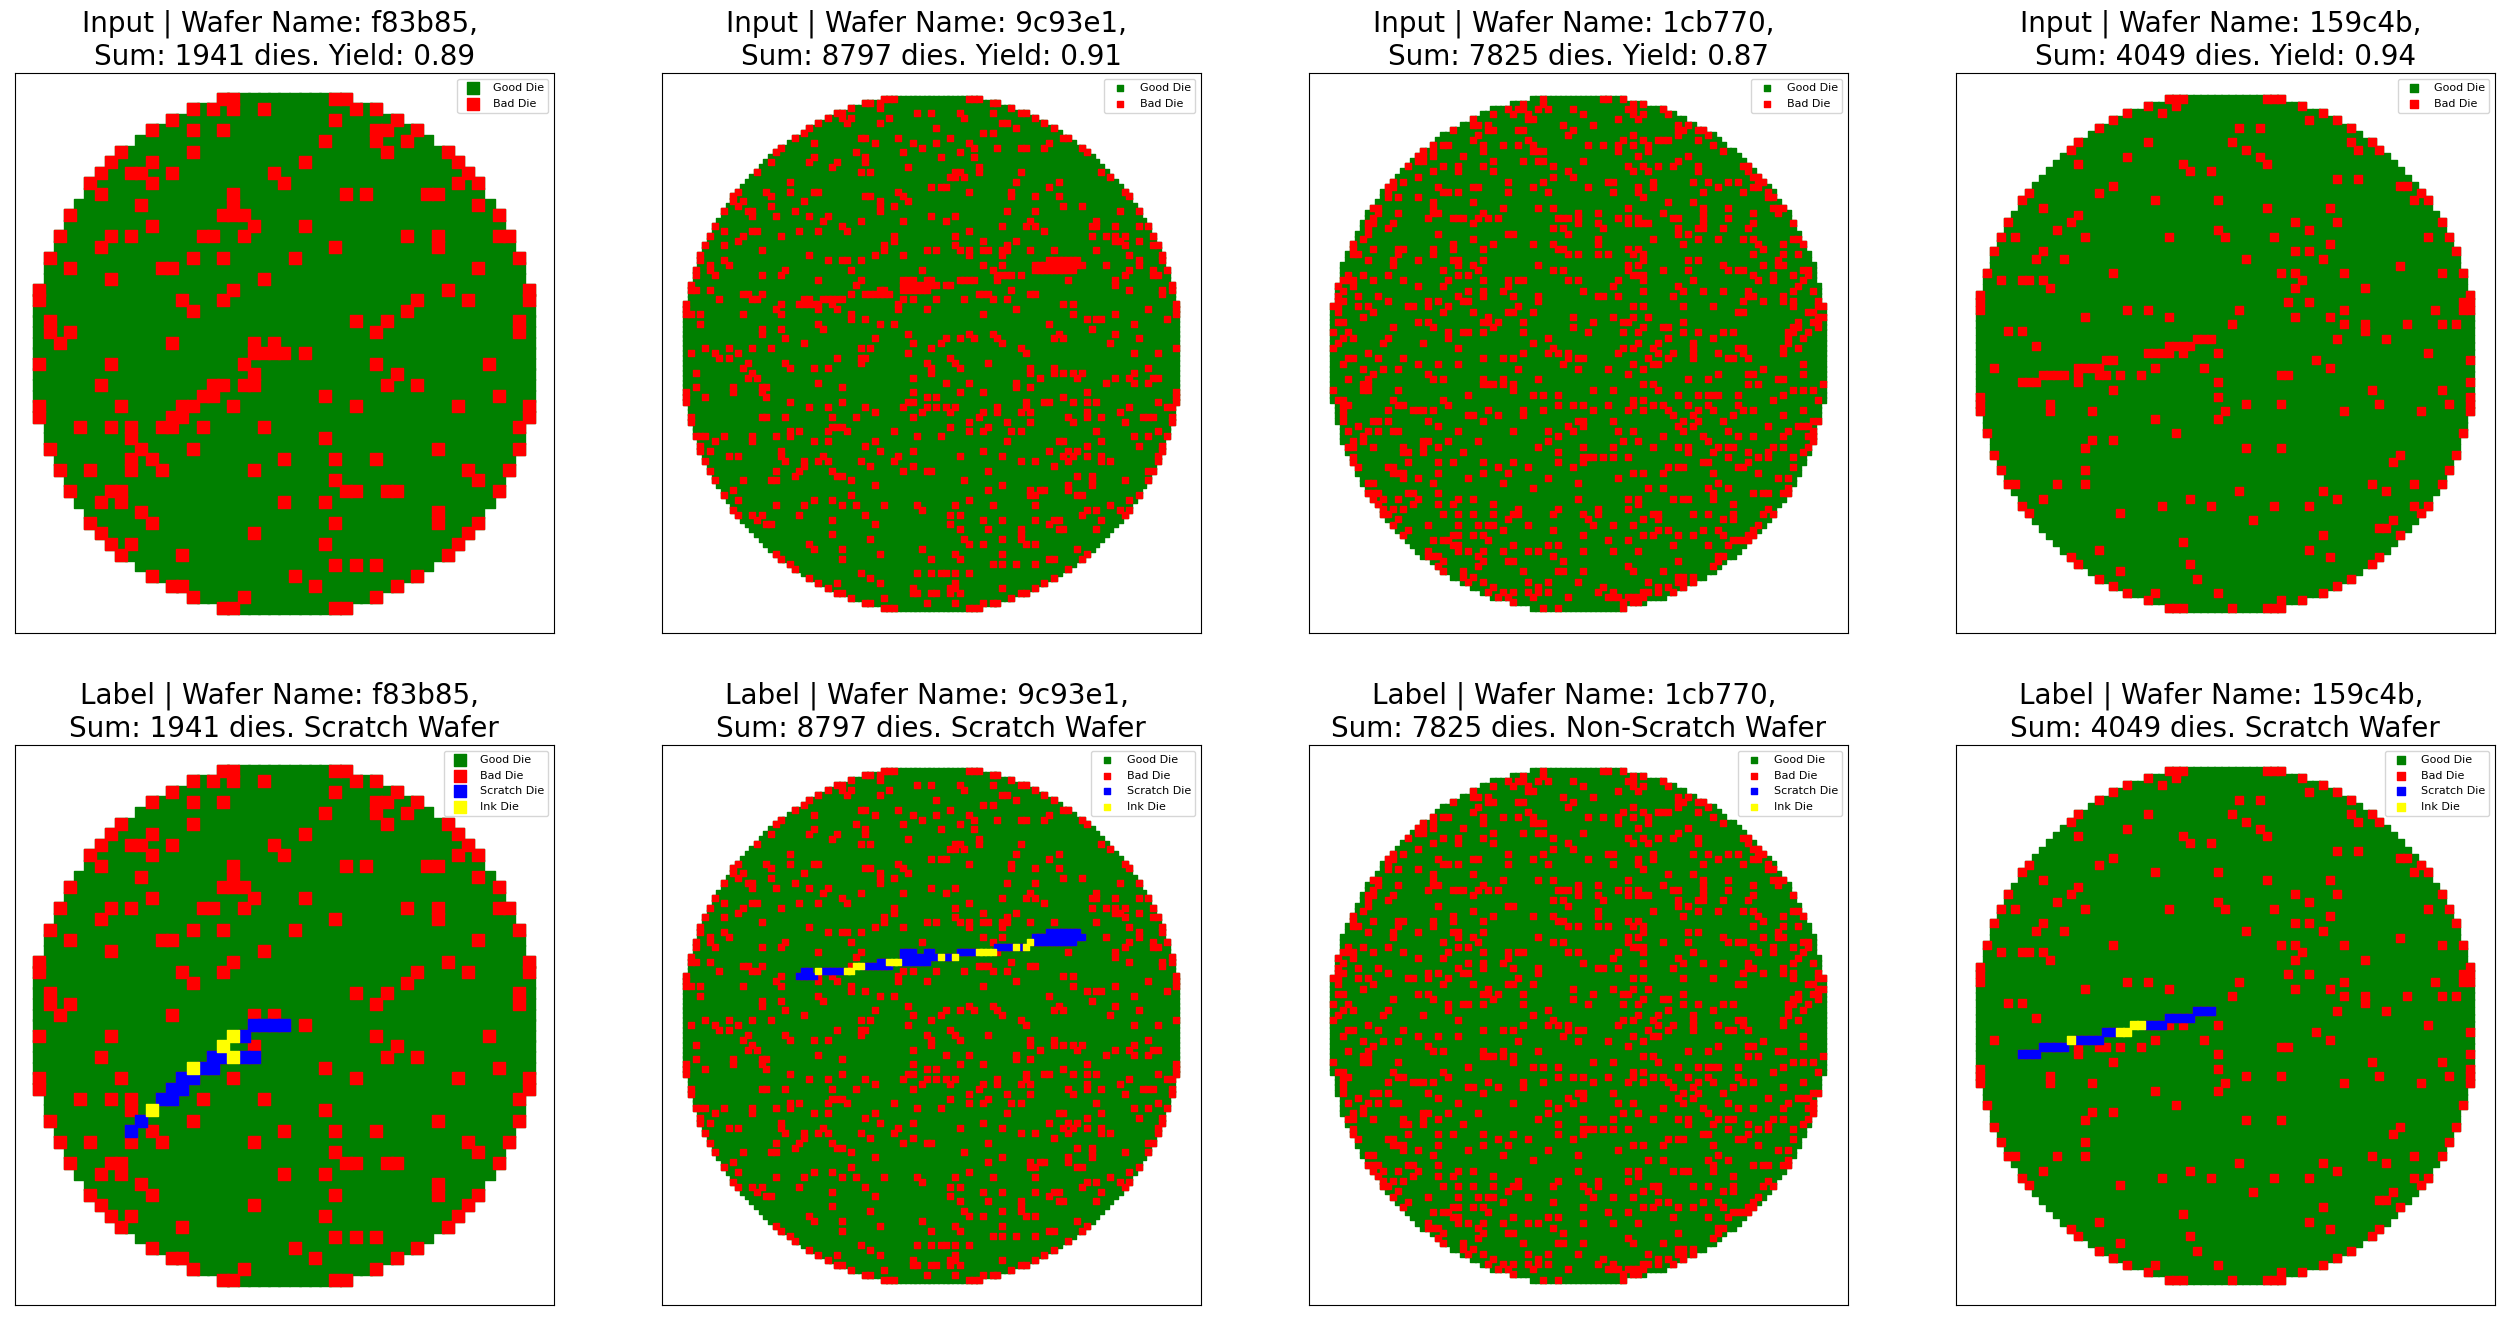

In [10]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

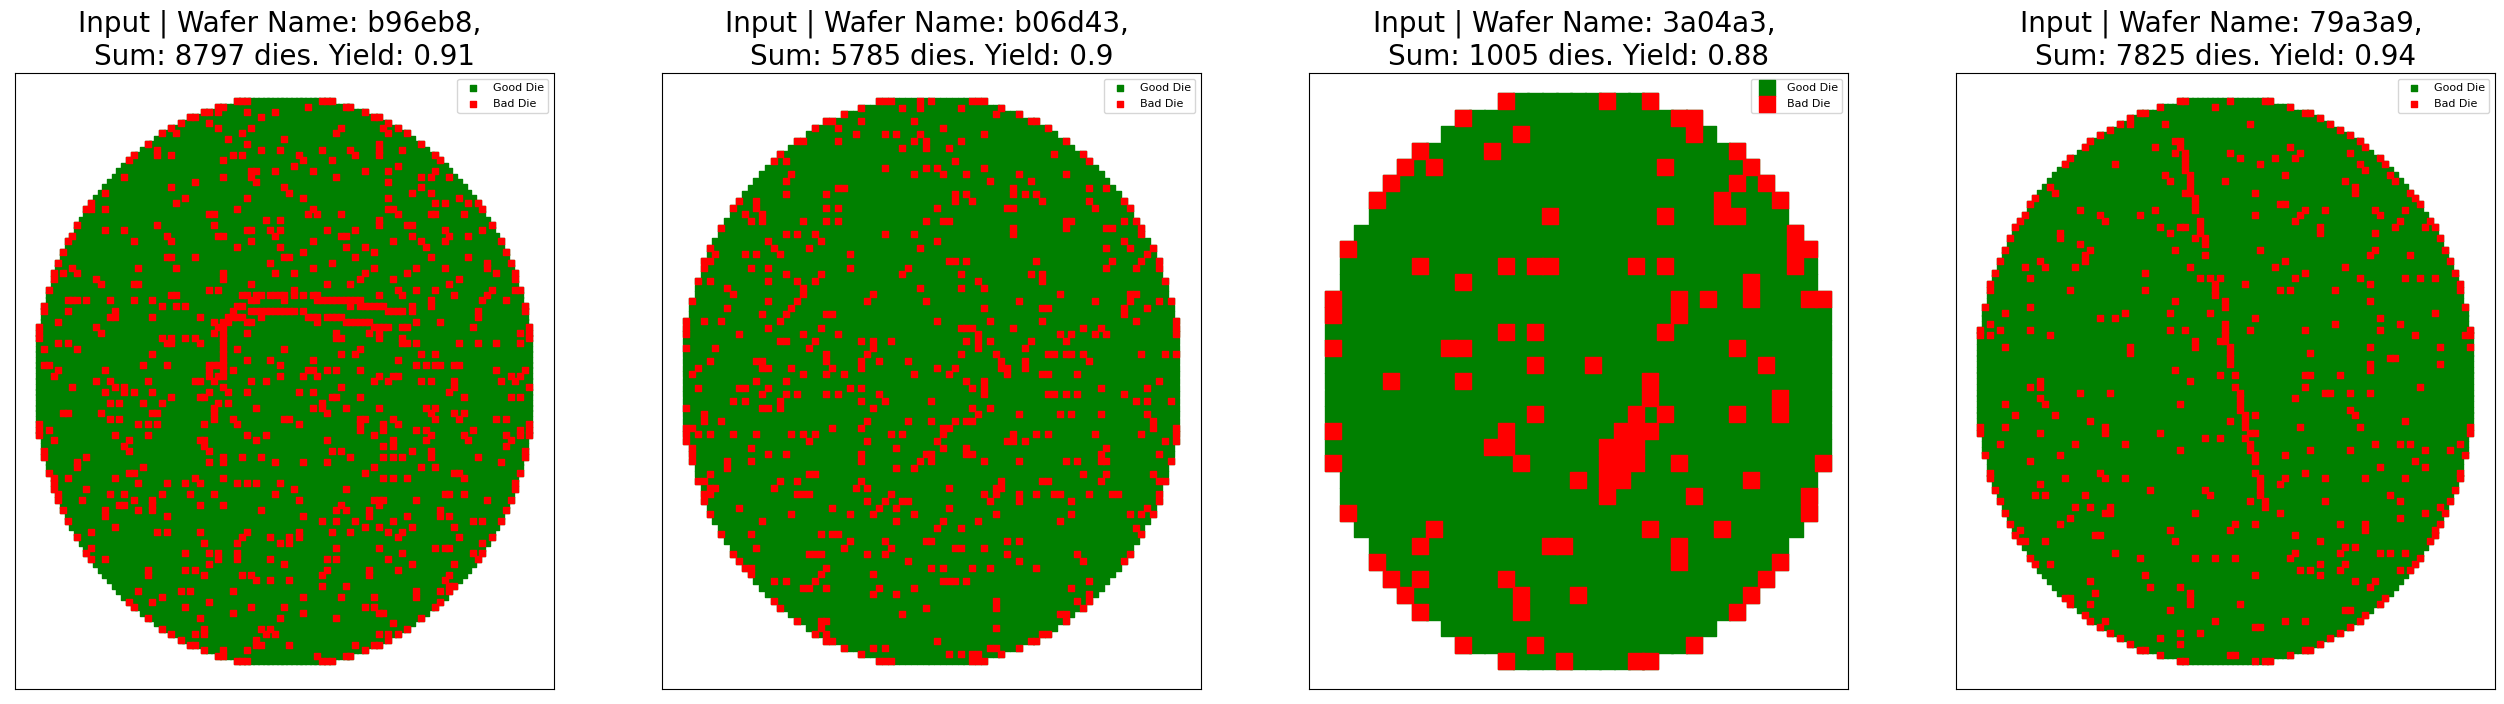

In [11]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

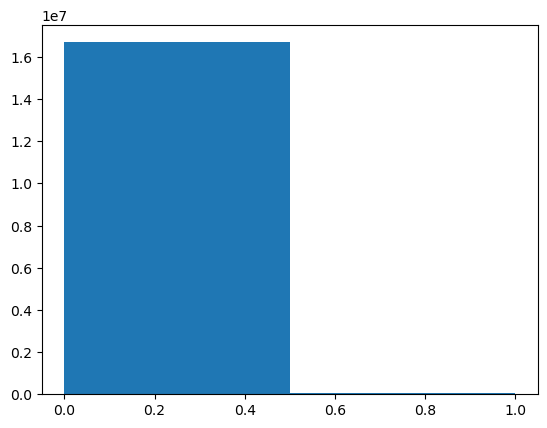

In [12]:
#################################verification of the data######################################
# Drop rows with missing values and drop duplicate
df_wafers.dropna(inplace=True)
df_wafers.drop_duplicates(inplace=True)
#converting true ans false to 0 and 1
df_wafers.iloc[:,3:5]= df_wafers.iloc[:,3:5].astype(int)
###############################################################################################

#######################adding dimensional features#############################################
import matplotlib.pyplot as plt
plt.hist(df_wafers['IsScratchDie'],bins=2)
df_wafers['Distance'] = pow(pow(df_wafers['DieX'],2)+pow(df_wafers['DieY'],2),1/2)
import numpy as np
df_wafers['CosineSimilarity'] = np.dot(df_wafers.iloc[:,1:3],[1,0])/df_wafers['Distance']
#################################################################################################

In [13]:
###########################split the data into train,validation and test########################################
#train(90%) and test(10%)
from sklearn.model_selection import GroupShuffleSplit
test_splitter = GroupShuffleSplit(test_size=.10, n_splits=1, random_state = 7)
split_test = test_splitter.split(df_wafers, groups=df_wafers['WaferName'])
train_idx, test_idx  = next(split_test)
train_data = df_wafers.iloc[train_idx,:]
test_data = df_wafers.iloc[test_idx,:]
x_test = test_data.iloc[:,[1,2,3,5,6]]
y_test = test_data.iloc[:,4]
#transform the dataset
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)
#train(80%) and validation(10%)
val_splitter = GroupShuffleSplit(test_size=0.11, n_splits=5, random_state = 7)
split_val = val_splitter.split(train_data, groups=train_data['WaferName'])
lst_x_train=[]
lst_y_train=[]
lst_x_val=[]
lst_y_val=[]
for i ,(train_idx, val_idx) in enumerate(split_val):
    print(f"group{i+1}")
    print(f"TRAIN: {train_idx}, length:{len(train_idx)} \n VALIDATION: {val_idx}, length:{len(val_idx)}")
    print("")
    lst_x_train.append(df_wafers.iloc[train_idx,[1,2,3,5,6]])
    lst_y_train.append(df_wafers.iloc[train_idx,4])
    lst_x_val.append(df_wafers.iloc[val_idx,[1,2,3,5,6]])
    lst_y_val.append(df_wafers.iloc[val_idx,4])
######################################################################################################

group1
TRAIN: [    1005     1006     1007 ... 15092300 15092301 15092302], length:13453603 
 VALIDATION: [       0        1        2 ... 15092673 15092674 15092675], length:1639073

group2
TRAIN: [       0        1        2 ... 15092300 15092301 15092302], length:13449767 
 VALIDATION: [    6030     6031     6032 ... 15092673 15092674 15092675], length:1642909

group3
TRAIN: [       0        1        2 ... 15092673 15092674 15092675], length:13390347 
 VALIDATION: [    7035     7036     7037 ... 15088943 15088944 15088945], length:1702329

group4
TRAIN: [       0        1        2 ... 15092673 15092674 15092675], length:13381651 
 VALIDATION: [    6030     6031     6032 ... 15091927 15091928 15091929], length:1711025

group5
TRAIN: [       0        1        2 ... 15092673 15092674 15092675], length:13452711 
 VALIDATION: [   13065    13066    13067 ... 15090808 15090809 15090810], length:1639965



In [17]:
####################################model and hyper-parameters###################################################
from sklearn.model_selection import RandomizedSearchCV
import xgboost
model = xgboost.XGBClassifier()
params = {
 'learning_rate' : [0.02,0.03,0.05,0.07,0.10,0.25],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15, 18],
 'min_child_weight' : [ 3, 5, 7, 9 ],
 'gamma': [ 0.1, 0.2 , 0.3, 0.4, 0.5,0.6, 0.7],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7, 0.9],
 'scale_pos_weight' : [10, 25, 50, 60, 75, 99,200, 1000]
}
##############################################################################################################

In [18]:
#########################################metrics###########################################################
from sklearn.metrics import precision_score,recall_score,make_scorer,f1_score
#################################################################################################################

In [19]:
#########################################cross-validation#######################################################
lst_estimators = []
for i in range(0,5):
    rs_model=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='f1',n_jobs=-1 ,verbose=3)
    rs_model.fit(lst_x_train[i],lst_y_train[i])
    prediction = rs_model.predict(lst_x_val[i])
    print(f"iteration:{i} \n recall:{recall_score(prediction,lst_y_val[i])},\n"
          f" presicion:{precision_score(prediction,lst_y_val[i])},\n"
          f"f1:{f1_score(prediction,lst_y_val[i])},\n"
          f" best estimator:{rs_model.best_estimator_}")
    lst_estimators.append(rs_model.best_estimator_)
###############################################################################################################

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:52:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
iteration:0 
 recall:0.04521480591161051,
 presicion:0.7191548232926676,
f1:0.08508042317020548,
 best estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=50,
           

C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:04:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
iteration:1 
 recall:0.06665643282334681,
 presicion:0.44023881942097554,
f1:0.1157823008325186,
 best estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=25,
          

C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:44:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
iteration:2 
 recall:0.05552672548002076,
 presicion:0.6999366955053808,
f1:0.10289099820088093,
 best estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=75,
          

C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[07:57:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
iteration:3 
 recall:0.0683045702640692,
 presicion:0.5163201551222665,
f1:0.12064842550406525,
 best estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=18,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=25,
           

C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:46:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
iteration:4 
 recall:0.05829683998437468,
 presicion:0.6574310224901461,
f1:0.10709699350355041,
 best estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=10,
              min_child_weight=9, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=60,
          

In [23]:
#######################################model with the best parameters##########################################
from numpy import nan
model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=18,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=25,
              subsample=1, tree_method='approx', validate_parameters=1,
              verbosity=None)
################################################################################################################

In [25]:
#######################fiting the data to the model with the best parameters#################################
model= model.fit(train_data.iloc[:,[1,2,3,5,6]],train_data.iloc[:,4])
#############################################################################################################

######################################test data###############################################################
prediction_test = model.predict(x_test)
print(f" recall:{recall_score(prediction_test,y_test)},\n"
      f" presicion:{precision_score(prediction_test,y_test)},\n"
      f"f1:{f1_score(prediction_test,y_test)}.")
#############################################################################################################

C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\salom\anaconda3\envs\salom\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:40:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 recall:0.05846039419858683,
 presicion:0.5124527317772851,
f1:0.10494832696878255.


# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [81]:
#TODO add your thoughts
#In the assignment:
#1- The data is highly unbalanced.  I had to precisely define the metrics to look at. I chose recall, precision and f1 which allow a better perspective for unbalanced data.
# To give more importance to the class with a low representation, I hand more weight to this class with the parameter 'scale_pos_weight'. With more time, I would have implemented the SMOTE() class to create more data of the low representation class,'IsScratchiDie == 1'.
#2-The table data represent images. I split my data carefully, so I didn't mix up images, for example, we don't want to put half of an image in the train set and the other half in the test set, same with the cross-validation.So I did ‘manually’ the cross-validation (with a for loop).
#3-I  added 2 more dimensional features: ‘Distance’ and ‘Cosine similarity’. I thought that it could help the model to understand the dimensional connection in the data and determine patterns that can improve the performance of the model.
#4- I chose the xgboost model because it is good for Classification and adapts well to table data, furthermore it uses a highly scalable training method that avoids overfitting. It is fast in comparison to the other possible models.
#5-I think that another possible solution to solve the scratch wafer detection can be a CNN model. We are dealing with table data that can be converted into images, as you show at the beginning of the assignment.Indeed, CNN is used primarily for image recognition and processing.




# Submission

In [78]:
###########################################Test_Data_given_by_ni###############################################
df_wafers_test.iloc[:,3]= df_wafers_test.iloc[:,3].astype(int)
df_wafers_test['Distance'] = pow(pow(df_wafers_test['DieX'],2)+pow(df_wafers_test['DieY'],2),1/2)
df_wafers_test['CosineSimilarity'] = np.dot(df_wafers_test.iloc[:,1:3],[1,0])/df_wafers_test['Distance']
###############################################################################################################

##########################################final_prediction#####################################################
IsScratchDie = model.predict(df_wafers_test.iloc[:,1:6])
df_wafers_test['IsScratchDie'] = IsScratchDie
df_wafers_test.iloc[:,[3,6]]= df_wafers_test.iloc[:,[3,6]].astype(bool)
df_wafers_test.to_csv('df_wafers_test_with_preds.csv')
###############################################################################################################